## ANALYSIS OF OZP RESULTS

In [2]:
import pandas as pd
import numpy as np

In [3]:
results_phi_en = pd.DataFrame(pd.read_csv('Results\EN-PHI3.csv'))
results_phi_ru = pd.DataFrame(pd.read_csv('Results\RU-PHI3.csv'))
results_gemma_en = pd.DataFrame(pd.read_csv('Results\EN-GEMMA.csv'))
results_gemma_ru = pd.DataFrame(pd.read_csv('Results\RU-GEMMA.csv'))
results_llama_en = pd.DataFrame(pd.read_csv('Results\EN-LLAMA3.csv'))
results_llama_ru = pd.DataFrame(pd.read_csv('Results\RU-LLAMA3.csv'))

complete_df = pd.concat([results_phi_en, results_phi_ru, results_gemma_en, results_gemma_ru, results_llama_en, results_llama_ru], axis=0).reset_index()
complete_df = complete_df.drop(labels=['index', 'Unnamed: 0'], axis = 1)

alldfs = {
    "PHI-EN": results_phi_en, 
    "PHI-RU": results_phi_ru, 
    "GEMMA-EN": results_gemma_en, 
    "GEMMA-RU": results_gemma_ru, 
    "LLAMA-EN": results_llama_en, 
    "LLAMA-RU": results_llama_ru
}

In [4]:
complete_df.columns

Index(['Language', 'Model', 'BeamSearch', 'Temperature', 'Category',
       'Input String', 'Original', 'Generated', 'TextID', 'BERTScore F1',
       'chrF++', 'Sentence BLEU', 'Corpus BLEU'],
      dtype='object')

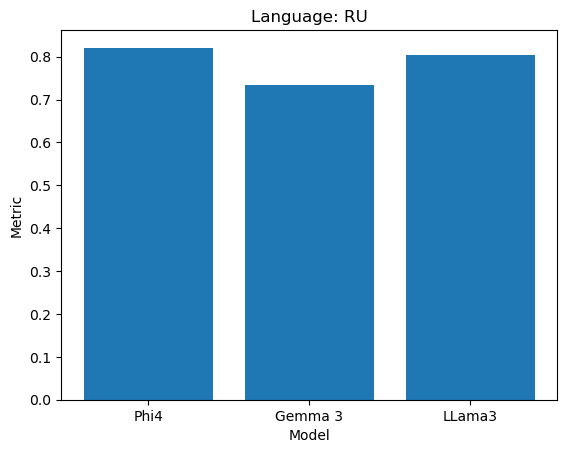

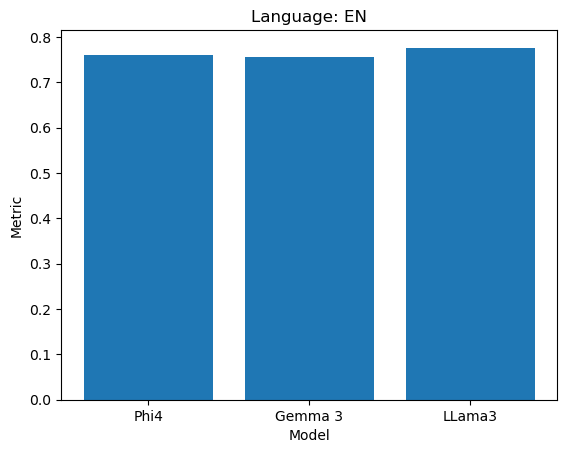

In [10]:
# Show BERTScore Per language per model.

for lang in ["RU", "EN"]:
    import matplotlib.pyplot as plt
    df = complete_df.loc[complete_df["Language"] == lang] 

    x = ["Phi4", "Gemma 3", "LLama3"]
    y = df.groupby("Model")["BERTScore F1"].mean()

    plt.bar(x, y)
    plt.title(f"Language: {lang}")
    plt.xlabel("Model")
    plt.ylabel("Metric")
    plt.show()


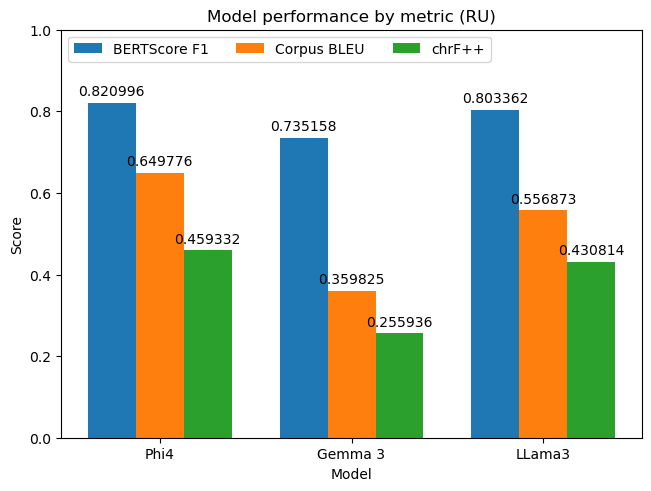

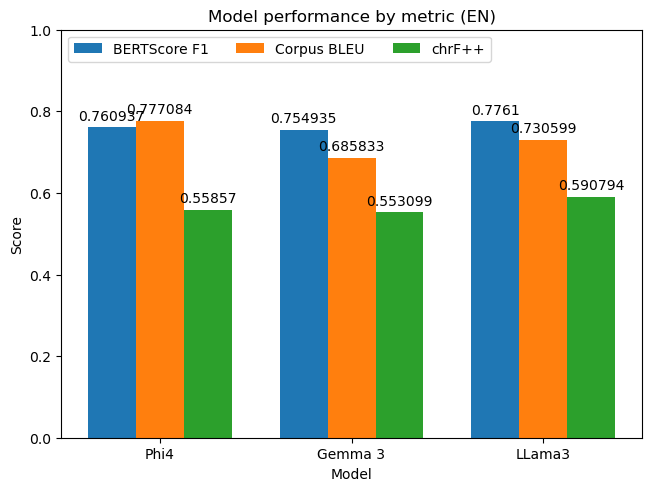

In [26]:
# Show all scores per language per model
for lang in ["RU", "EN"]:
    import matplotlib.pyplot as plt
    df = complete_df.loc[complete_df["Language"] == lang] 

    models = ("Phi4", "Gemma 3", "LLama3")
    means = {
        'BERTScore F1': df.groupby("Model")["BERTScore F1"].mean(),
        'Corpus BLEU': df.groupby("Model")["Corpus BLEU"].mean(),
        'chrF++': df.groupby("Model")["chrF++"].mean(),
    }

    x = np.arange(len(models))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_ylabel('Score')
    ax.set_xlabel("Model")
    ax.set_title(f'Model performance by metric ({lang})')
    ax.set_xticks(x + width, models)
    ax.legend(loc='upper left', ncol = 3)
    ax.set_ylim(0, 1)

    plt.show()





In [43]:

tdf = complete_df.loc[complete_df["Model"] == "Llama3"]
tdf["BERTScore F1"].value_counts()

1.000000    19
0.737292     3
0.799403     3
0.783565     3
0.852493     3
            ..
0.781409     1
0.940571     1
0.782344     1
0.782927     1
0.818308     1
Name: BERTScore F1, Length: 8010, dtype: int64

In [32]:
complete_df

,Language,Model,BeamSearch,Temperature,Category,Input String,Original,Generated,TextID,BERTScore F1,chrF++,Sentence BLEU,Corpus BLEU
0,EN,Phi4,4.0,NaN,SportsTeam,Estádio Municipal Coaracy da Mata Fonseca has ...,['Estádio Municipal Coaracy da Mata Fonseca is...,Estádio Municipal Coaracy da Mata Fonseca is l...,Id1,0.812556,0.667802,0.585486,0.782532
1,EN,Phi4,4.0,NaN,Astronaut,Nie Haisheng has birthDate 1964-10-13. Nie Hai...,"['Nie Haisheng, born on October 13, 1964, work...","Nie Haisheng was born on October 13, 1964, and...",Id2,0.856198,0.713093,0.928610,NaN
2,EN,Phi4,4.0,NaN,Airport,MotorSport Vision has city Fawkham.,['MotorSport Vision is located in the city of ...,MotorSport Vision is located in Fawkham.,Id3,0.905299,0.793287,1.000000,NaN
3,EN,Phi4,4.0,NaN,Athlete,Aleksandr Prudnikov has height 185.0 (centimet...,['185 centimetre tall Aleksandr Prudnikov play...,Aleksandr Prudnikov has a height of 185.0 cent...,Id4,0.767154,0.513698,0.552915,NaN
4,EN,Phi4,4.0,NaN,City,Ciudad Ayala has populationMetro 1777539. Ciud...,['Ciudad Ayala is a city with population densi...,"Ciudad Ayala is a city with a population of 1,...",Id5,0.754495,0.597208,0.691623,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25924,RU,Llama3,NaN,1.4,CelestialBody,(19255) 1994 VK8 имеет epoch 2006-12-31. (1925...,['Эпоха (19255) 1994 VK8 - 31 декабря 2006 год...,Астероид (19255) 1994 VK8 обнаружен 3 ноября 1...,Id1098,0.697072,0.231273,0.206931,NaN
25925,RU,Llama3,NaN,1.4,SportsTeam,Лумеццане (футбольный клуб) имеет manager Мише...,"['Итальянец Мишель Марколини играет за ФК ""Кье...",Мишель Марколини - итальянский футбольный тренер.,Id1099,0.704471,0.179182,0.136752,NaN
25926,RU,Llama3,NaN,1.4,Astronaut,"Олдрин, Базз имеет selectedByNasa 1963 год.","['НАСА отобрало Базза Олдрина в 1963 году.', '...",Принадлежность НАСА: Х,Id1100,0.620137,0.105903,0.146933,NaN
25927,RU,Llama3,NaN,1.4,CelestialBody,1097 Виция имеет epoch 2006-12-31. 1097 Виция ...,['Эпоха 1097 Виции - 31.12.2006. Космическая с...,Виция имеет эпоху 2006-12-31. Виция имеет эска...,Id1101,0.766215,0.397126,0.578692,NaN


# Sampling for human evaluation

In [47]:
phi_dfs = {
    "PHI-EN": results_phi_en, 
    "PHI-RU": results_phi_ru
}

for name, df in phi_dfs.items():

    beam_rows = df.loc[df["BeamSearch"] == 4.0]
    temp_08_rows = df.loc[df["Temperature"] == 0.8]
    temp_14_rows = df.loc[df["Temperature"] == 1.4]

    beam_sample = beam_rows.sample(10, random_state = 18)
    temp_08_sample = temp_08_rows.sample(10, random_state = 19)
    temp_14_sample = temp_14_rows.sample(10, random_state = 20)

    sample  = pd.concat([beam_sample, temp_08_sample, temp_14_sample], axis=0)
    sample = sample.reset_index()

    filename = f"{name}_SAMPLE_3.csv"
    sample.to_csv(filename, index = True)

    

In [30]:

datasample = pd.DataFrame(pd.read_csv('Results\PHI-EN_SAMPLE.csv'))

for i in range(len(datasample)):
    print(datasample.loc[i]["Generated"])
    print()
    generated = datasample.loc[i]["Original"].split("', '")
    generated[0] = generated[0][2:]
    generated[-1] = generated[-1][:-2]

    gentext = ""
    for line in generated:
        gentext += line
        gentext += '\n'
    
    print(gentext)
    print()
    

Bedford Aerodrome, operated by MotorSport Vision, has the ICAO Location Identifier EGBF and is situated at an elevation of 83.2104 feet above sea level. The aerodrome features a runway named 08/26, which is made of concrete.

MotorSport Vision is the operating organisation for Bedford Aerodrome which has a runway surface made out of concrete. Bedford Aerodrome's International Civil Aviation Organization (ICAO) identifier is EGBF and it is 83.2104 above sea level. The aerodrome has a runway called 08/26.", 'The Bedford Aerodrome, operated by the MotorSport Vision, is located 83.2 meters above sea level at ICAO location identifier EGBF. It has a concrete runway named "08/26".
MotorSport Vision operates the Bedford Aerodrome, whose ICAO location identifier is EGBF. It is also known for a runway called 08/26, and it has a runway surface made of concrete with the elevation above sea level of 82.2104.


Mexico has currency Mexican peso. Mexico has demonym Mexicans. Bionico has course Dessert

In [20]:
og_df

,Unnamed: 0.1,index,Unnamed: 0,Language,Model,BeamSearch,Temperature,Category,Input String,Original,Generated,TextID,BERTScore F1,chrF++,Sentence BLEU,Corpus BLEU
0,0,883,883,EN,Phi4,4.0,NaN,City,Ciudad Ayala has populationDensity 1604.0. Ciu...,"['In the Pacific Daylight/Standard Time Zone, ...",Ciudad Ayala has a population density of 1604....,Id884,0.756834,0.552139,0.629040,NaN
1,1,1516,1516,EN,Phi4,4.0,NaN,Artist,Liselotte Grschebina has birthDate 1908-05-02....,"['Liselotte Grschebina, an Israeli national bo...","Liselotte Grschebina was born on May 2, 1908, ...",Id1517,0.864068,0.692281,0.796456,NaN
2,2,124,124,EN,Phi4,4.0,NaN,Scientist,Olga Bondareva has birthDate 1937-04-27. Olga ...,"['Olga Bondareva, who lived from April 27th, 1...","Olga Bondareva was born on April 27, 1937, and...",Id125,0.797740,0.596184,0.794253,NaN
3,3,1579,1579,EN,Phi4,4.0,NaN,MeanOfTransportation,Pontiac has product Automobile.,['The Pontiac company manufactures automobiles...,Pontiac manufactures automobiles.,Id1580,0.927509,0.671361,1.000000,NaN
4,4,1555,1555,EN,Phi4,4.0,NaN,MusicalWork,Nord (Year of No Light album) has releaseDate ...,"[""The Year of No Light's sludge metal album ca...",Nord (Year of No Light album) was released on ...,Id1556,0.748880,0.565430,0.800182,NaN
5,5,429,429,EN,Phi4,4.0,NaN,MusicalWork,Nord (Year of No Light album) has recordLabel ...,"[""The Year of No Light album Nord's record lab...",Nord (Year of No Light) has recordLabel E-Vinyl.,Id430,0.703070,0.455028,0.633480,NaN
6,6,577,577,EN,Phi4,4.0,NaN,Artist,Liselotte Grschebina has birthPlace German Emp...,['Liselotte Grschebina was born 115 meters abo...,Liselotte Grschebina was born in the German Em...,Id578,0.819804,0.675447,0.826848,NaN
7,7,1180,1180,EN,Phi4,4.0,NaN,Film,Its Great to Be Young (1956 film) has runtime ...,"[""The duration of the film 'It's great to be y...",Its Great to Be Young (1956 film) has a runtim...,Id1181,0.654966,0.362017,0.683094,NaN
8,8,371,371,EN,Phi4,4.0,NaN,Company,Manila has isPartOf Metro Manila.,"['Manila is part of Metro Manila.', 'Metro Man...",Manila is part of Metro Manila.,Id372,0.873286,0.741070,1.000000,NaN
9,9,424,424,EN,Phi4,4.0,NaN,Artist,German Empire has currency South German gulden.,"[""The German Empire's currency is the South Ge...",The German Empire used the South German gulden...,Id425,0.798559,0.639250,0.851494,NaN


In [ ]:
# ADDING RESULTS INTO SAMPLE FILES

results = pd.DataFrame(pd.read_csv('Results/Samples/human_phi3ru.csv'))
og_df = pd.DataFrame(pd.read_csv('Results\Samples\PHI-RU_SAMPLE_3_DONE.csv'))
print(results.columns)

results = results.drop(labels = ['StartDate',
'EndDate',
'Status',
'IPAddress',
'Progress',
'Duration (in seconds)',
'Finished',
'RecordedDate',
'ResponseId',
'RecipientLastName',
'RecipientFirstName',
'RecipientEmail',
'ExternalReference',
'LocationLatitude',
'LocationLongitude',
'DistributionChannel',
'UserLanguage',
'Q37'
], axis=1)

og_df = og_df.drop(labels = ['Unnamed: 0.1',
'index',
'Unnamed: 0'
], axis=1)

results = results.iloc[2:]


correctness = [] # 1
readability = [] # 2
hallucination = [] # 3


for col in results.columns:

    if col[-1] == '1':

        list = results[col].tolist()
        list = [float(x) for x in list]
        list = [i for i in list if str(i) != 'nan']
        avg = sum(list) / len(list)
        correctness.append(avg)
            
    if col[-1] == '2':

        list = results[col].tolist()
        list = [float(x) for x in list]
        list = [i for i in list if str(i) != 'nan']
        avg = sum(list) / len(list)
        readability.append(avg)

    if col[-1] == '3':

        list = results[col].tolist()
        list = [float(x) for x in list]
        list = [i for i in list if str(i) != 'nan']
        avg = sum(list) / len(list)
        hallucination.append(avg)


og_df["Correctness"] = correctness
og_df["Readability"] = readability
og_df["Hallucination"] = hallucination

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName',
       ...
       'Q28_3', 'Q30_1', 'Q30_2', 'Q30_3', 'Q31_1', 'Q31_2', 'Q31_3', 'Q29_1',
       'Q29_2', 'Q29_3'],
      dtype='object', length=108)
[nan, 10.0]
[10.0]
[10.0, 10.0]
[10.0, 10.0]
[10.0, 10.0]
[10.0, 10.0]
[10.0, 10.0]
[10.0, 10.0]
[10.0, 10.0]
[10.0, 10.0]
[nan, 10.0]
[10.0]
[nan, 5.0]
[5.0]
[10.0, 8.0]
[10.0, 8.0]
[8.0, 10.0]
[8.0, 10.0]
[10.0, 10.0]
[10.0, 10.0]
[10.0, 10.0]
[10.0, 10.0]
[8.0, 10.0]
[8.0, 10.0]
[8.0, 9.0]
[8.0, 9.0]
[10.0, 9.0]
[10.0, 9.0]
[4.0, 7.0]
[4.0, 7.0]
[10.0, 9.0]
[10.0, 9.0]
[10.0, 8.0]
[10.0, 8.0]
[10.0, 9.0]
[10.0, 9.0]
[10.0, 9.0]
[10.0, 9.0]
[10.0, 10.0]
[10.0, 10.0]
[10.0, 10.0]
[10.0, 10.0]
[4.0, 8.0]
[4.0, 8.0]
[10.0, 10.0]
[10.0, 10.0]
[3.0, 6.0]
[3.0, 6.0]
[nan, 8.0]
[8.0]
[10.0, 6.0]
[10.0, 6.0]
[10.0, 9.0]
[10.0, 9.0]
[9.0, 9.0]
[9.0, 9.0]
[7.0, 9.0]
[7.0, 9.0]
[9.0

In [82]:
og_df

,Language,Model,BeamSearch,Temperature,Category,Input String,Original,Generated,TextID,BERTScore F1,chrF++,Sentence BLEU,Corpus BLEU,Correctness,Readability,Hallucination
0,RU,Phi4,4.0,NaN,Food,Бионико имеет country Мексика. Мексика имеет l...,"['Бионико - блюдо из Мексики, подающееся в кач...",Бионико находится в Мексике. В Мексике говорят...,Id941,0.826062,0.425735,0.745367,NaN,10.0,3.5,5.0
1,RU,Phi4,4.0,NaN,Food,суп Бинигнит имеет ingredient таро.,"['Суп Бинигнит - это ингредиент, найденный в т...",Суп Бинигнит имеет ингредиент таро.,Id919,0.872263,0.464893,0.762093,NaN,10.0,6.5,NaN
2,RU,Phi4,4.0,NaN,Food,суп Бинигнит имеет ingredient Батат. суп Биниг...,"['Суп Бинигнит родом с Висайских островов, из ...","Суп Бинигнит имеет ингредиент Батат, происходи...",Id17,0.834087,0.501376,0.649972,NaN,10.0,6.5,3.0
3,RU,Phi4,4.0,NaN,Building,Соединённые Штаты Америки имеет language Англи...,"['Джо Байден – лидер Соединенных Штатов, главо...",Соединённые Штаты Америки говорят на английско...,Id438,0.827693,0.464376,0.673833,NaN,10.0,5.0,NaN
4,RU,Phi4,4.0,NaN,Astronaut,"Шепард, Алан имеет almaMater NWC, M.A. 1957. Ш...",['Алан Шепард родился в Нью-Гэмпшире 18 ноября...,Алан Шепард родился 18 ноября 1923 года в Нью-...,Id727,0.844536,0.622711,0.690915,NaN,10.0,9.0,NaN
5,RU,Phi4,4.0,NaN,SportsTeam,Массимо Драго имеет club Пескара (футбольный к...,"['Массимо Драго прикреплен к ФК ""Пескара"".']",Массимо Драго владеет футбольным клубом Пескара.,Id999,0.774355,0.399811,0.425447,NaN,10.0,10.0,5.0
6,RU,Phi4,4.0,NaN,Building,Калифорния имеет isPartOf Калифорния.,['Пасифик Гров - часть Калифорнии.'],Калифорния является частью Калифорнии.,Id896,0.793716,0.409408,0.456764,NaN,5.0,9.5,9.0
7,RU,Phi4,4.0,NaN,Food,“Беконный взрыв” / Bacon Explosion имеет count...,"['«Беконный взрыв» возник в США, где Барак Оба...","""Bacon Explosion"" - это блюдо из Соединённых Ш...",Id1030,0.802915,0.373151,0.470140,NaN,9.0,5.0,NaN
8,RU,Phi4,4.0,NaN,Building,бул. Север Ласаль 300 имеет location Чикаго. Ч...,['Бульвар Север Ласаль 300 находится в Чикаго ...,Бул. Север Ласаль 300 находится в Чикаго. Чика...,Id529,0.813639,0.532663,0.619506,NaN,9.0,8.0,NaN
9,RU,Phi4,4.0,NaN,Astronaut,"Шепард, Алан имеет mission Аполлон-14. Шепард,...","['Алан Шепард родился в Нью-Гэмпшире, был летч...","Алан Шепард, летчик-испытатель, родился в Нью-...",Id191,0.832404,0.411037,0.691914,NaN,10.0,9.5,NaN
